<a href="https://www.kaggle.com/code/dunnguynduy/bank-marketing-eda?scriptVersionId=190676990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Bank dataset EDA</h1>

<h2> Import Python Libraries </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h2> Reading Dataset </h2>

In [2]:
df = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/train.csv' , sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


- There are 45211 observations and 17 variables in our dataset
- There are some missing values in job, education, contact, poutcome (they have "unknown" value). we can see these missing values in 10 rows shown above. to find all missing values, we need further exploration.

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- we can see that there are 10 categorical features and 7 numeric features.
- we can see that there is no null values in any column but as said before, there exists some missing values in some columns.

In [5]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

**Descriptive statistics of numeric columns**

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Descriptive statistics of categorical columns**

In [7]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [8]:
def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

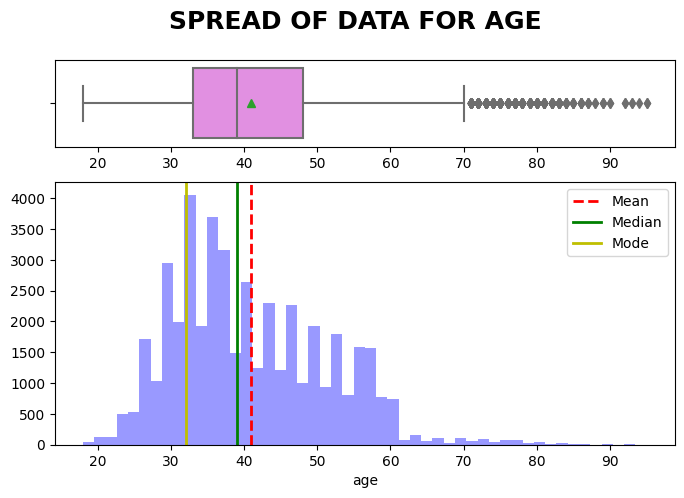

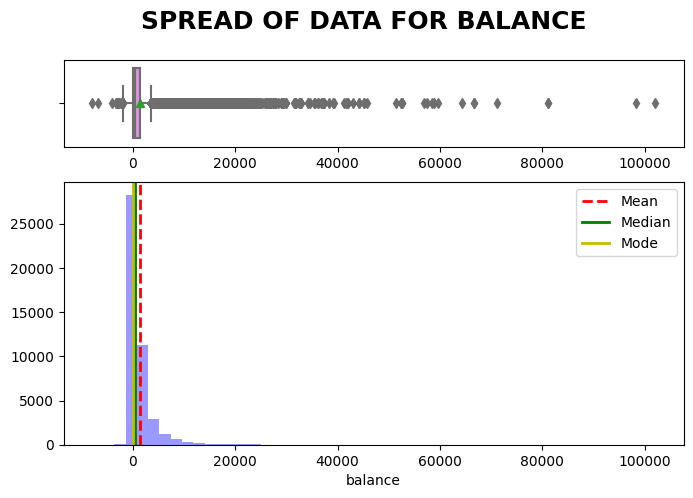

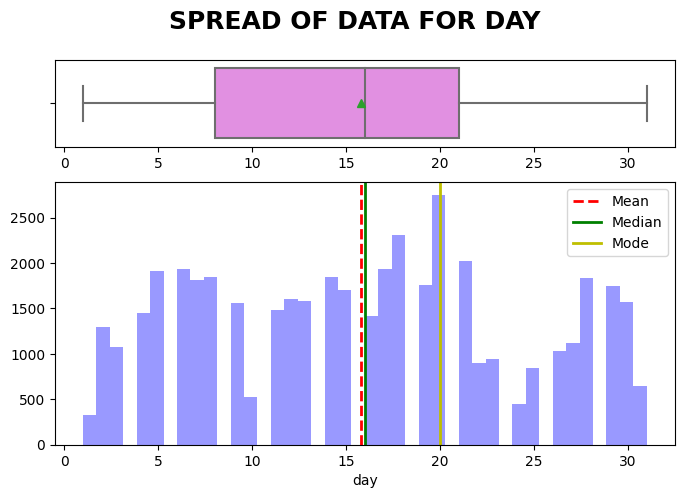

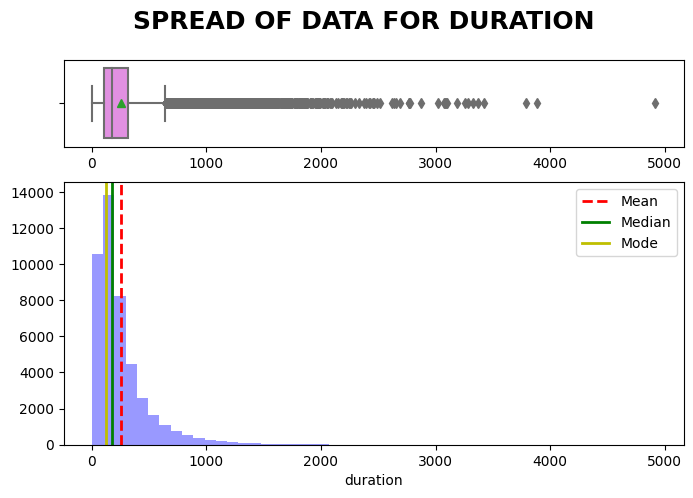

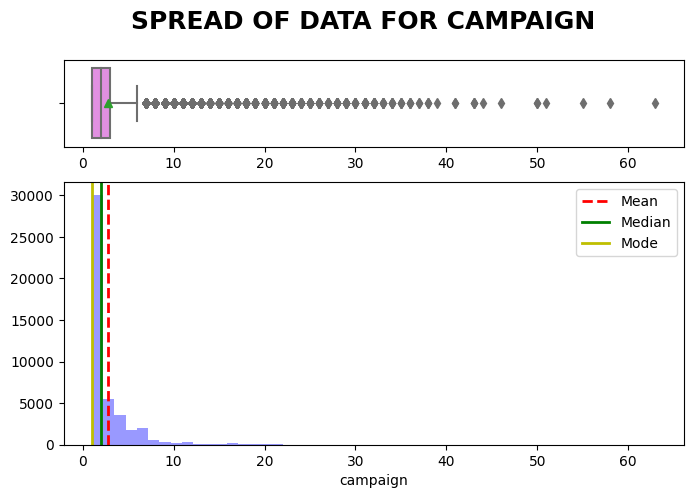

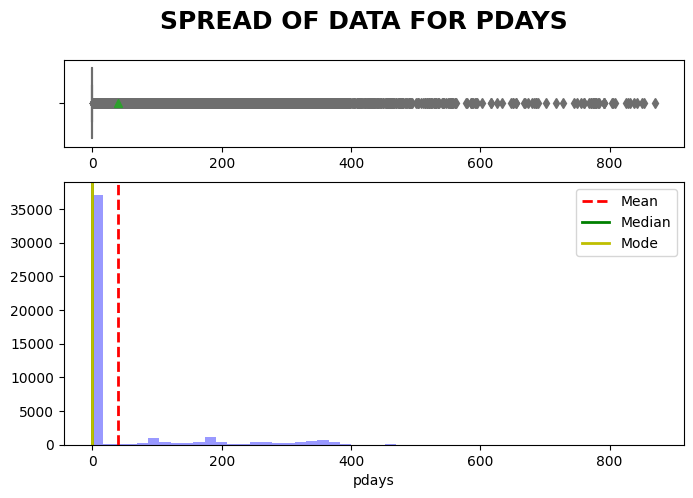

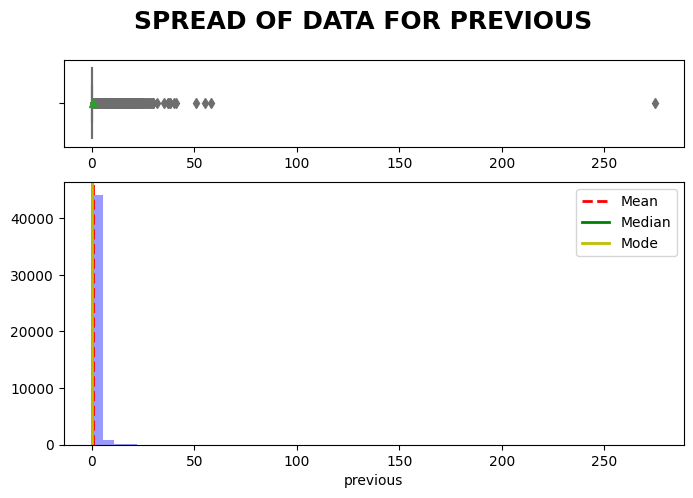

In [9]:
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

**Age column**

- minimum of customer age is 18 and maximum is 95 according to df.describe().
- so to have count of each age the bins argument should be 95-18+1.
- it is obvious that most of the customers are aged between 25 to 60. 
- according to the boxplot the ages above 70 are considered outliers. 
- the last histogram is the histogram of age ignoring outliers.

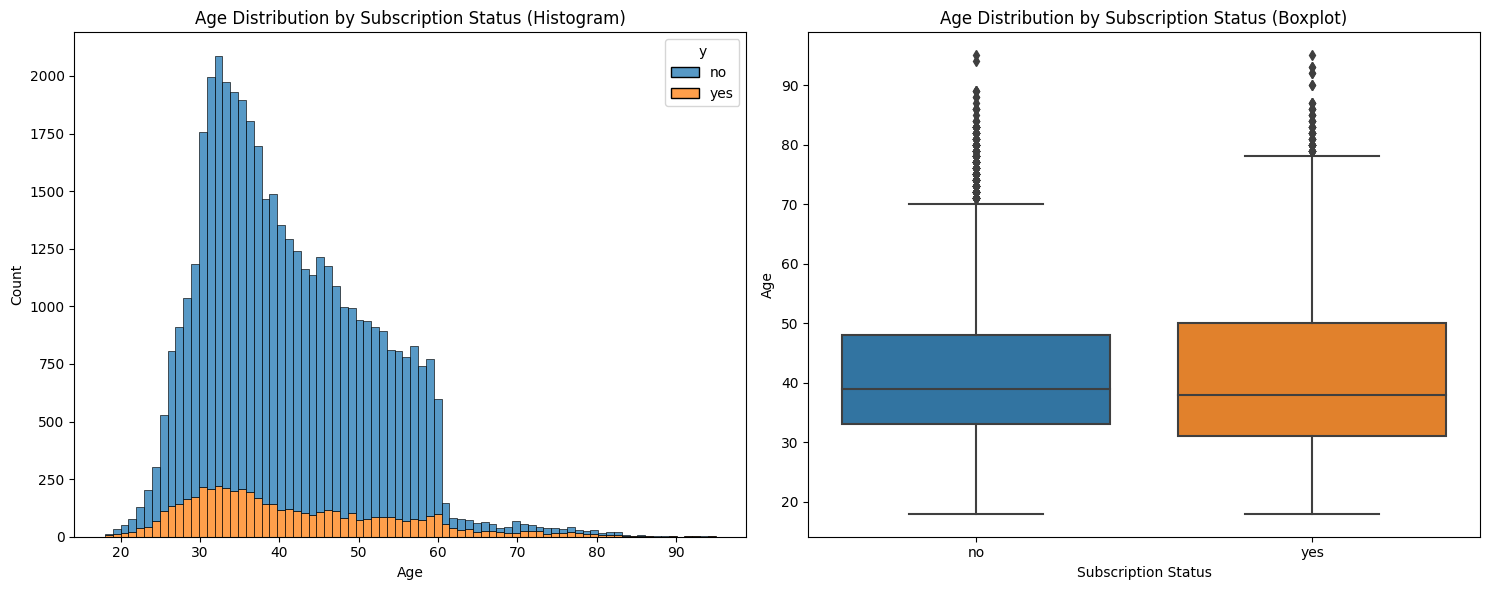

In [10]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', bins=95-18+1, hue='y', multiple='stack')
plt.title('Age Distribution by Subscription Status (Histogram)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='age')
plt.title('Age Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

**job column**

- blue-collar has the maximum count.
- there is an "unknown" category for jobs which can be considered as missing value and has the minumum count. 
- following "unknown", the job category "student" ranks second with the least count.

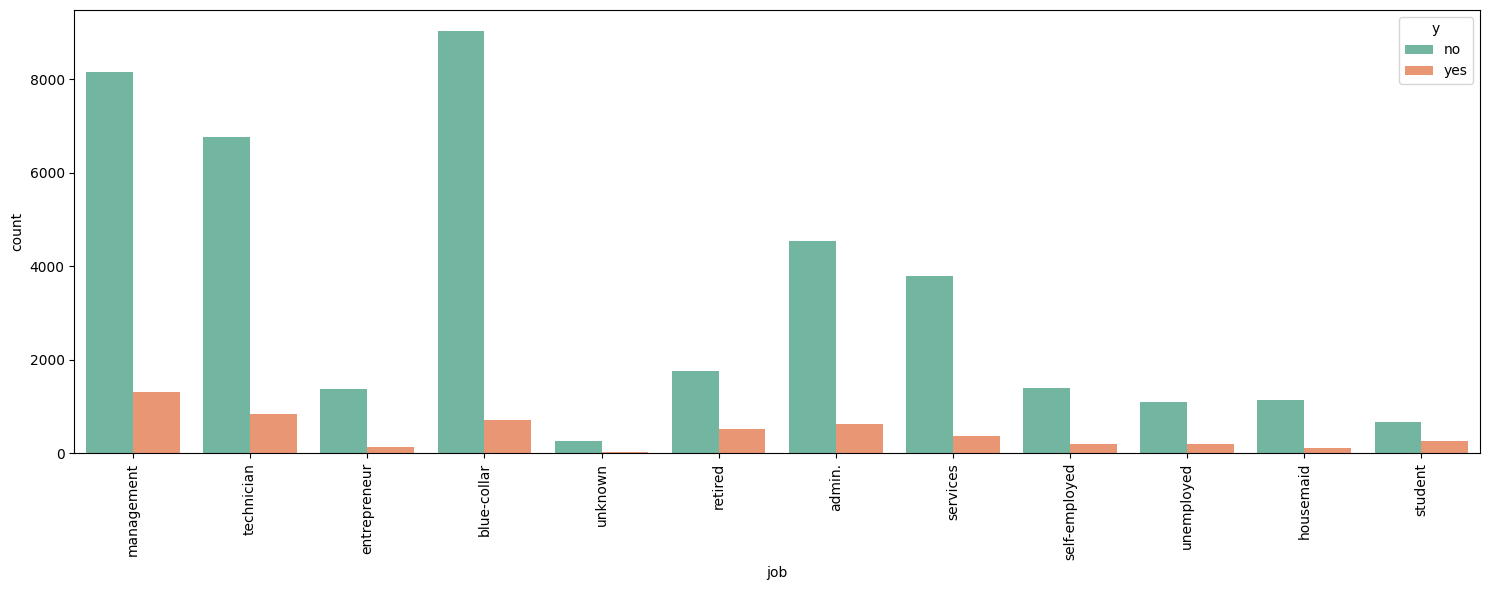

In [11]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="job", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**marital column**

- married has the maximum count, followed by single and divorced consequetively.

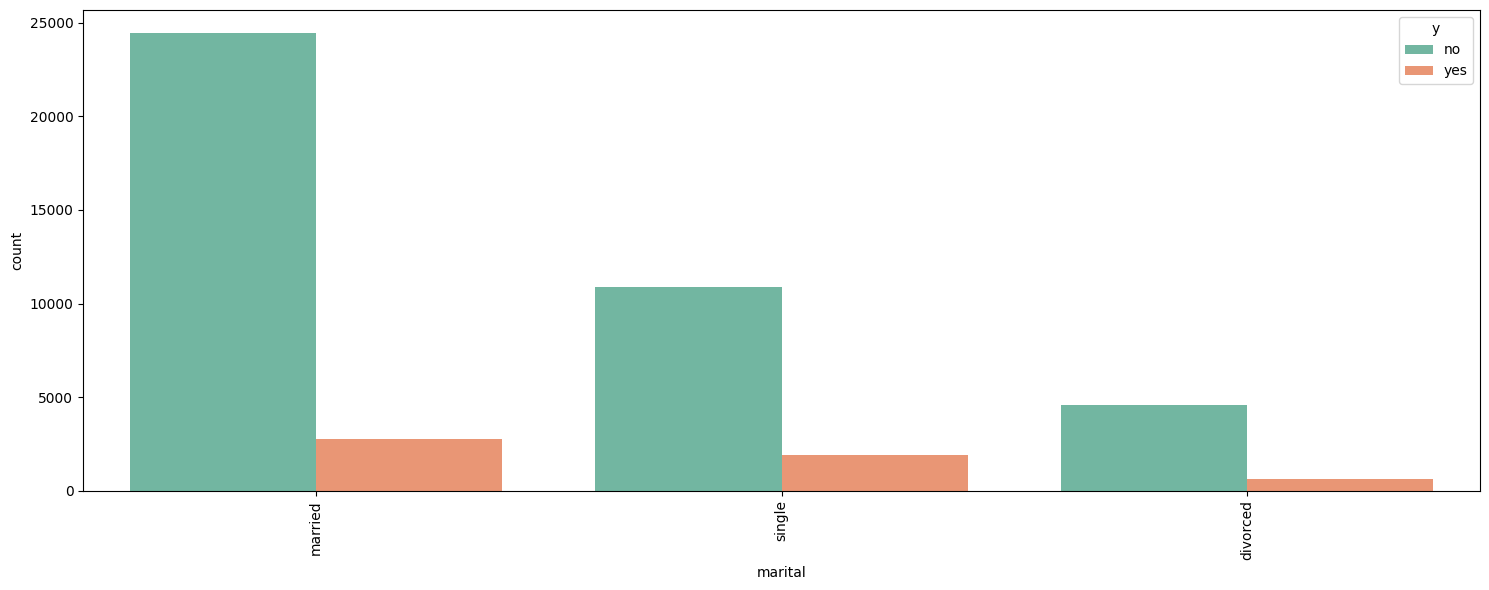

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="marital", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**education column**

- secondary has the maximum count.
- there is an "unknown" category for education which can be considered as missing value and has the minumum count. 
- following "unknown", the education category "primary" ranks second with the least count. 

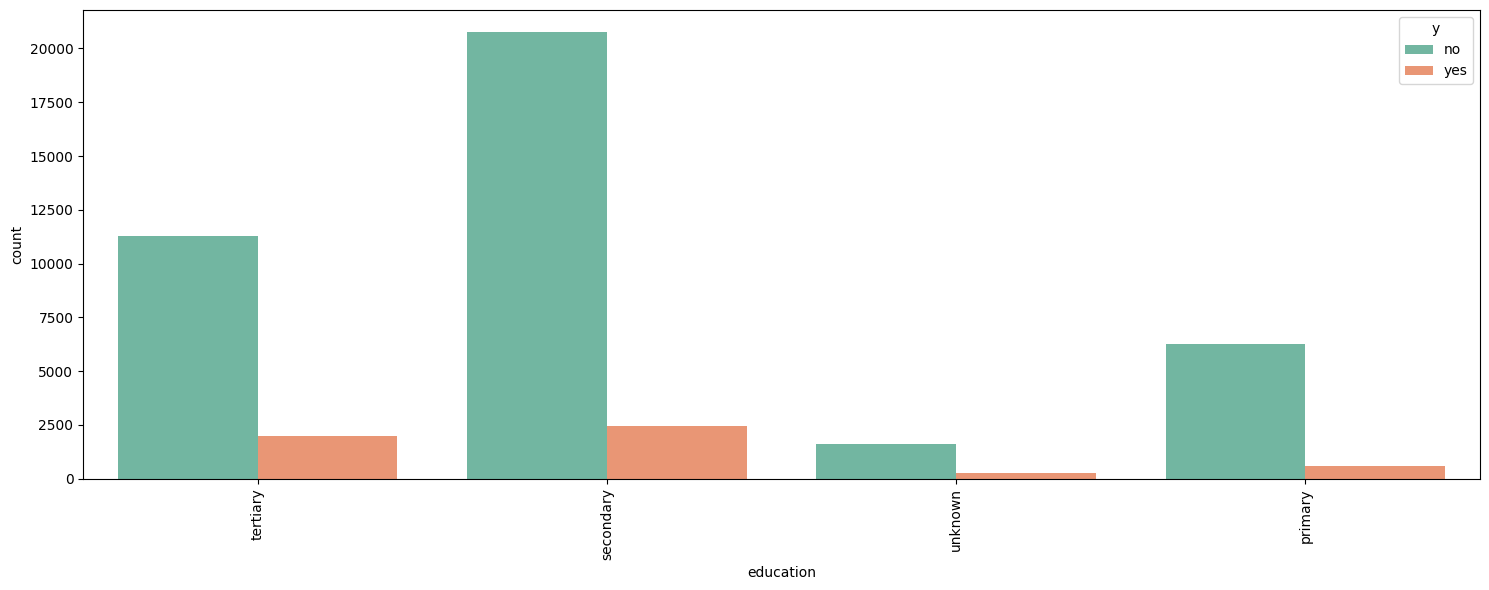

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="education", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**default column**

- this column shows whether the customer has credit in default or not. 
- it is obvious that most of the customers have no default credits. 

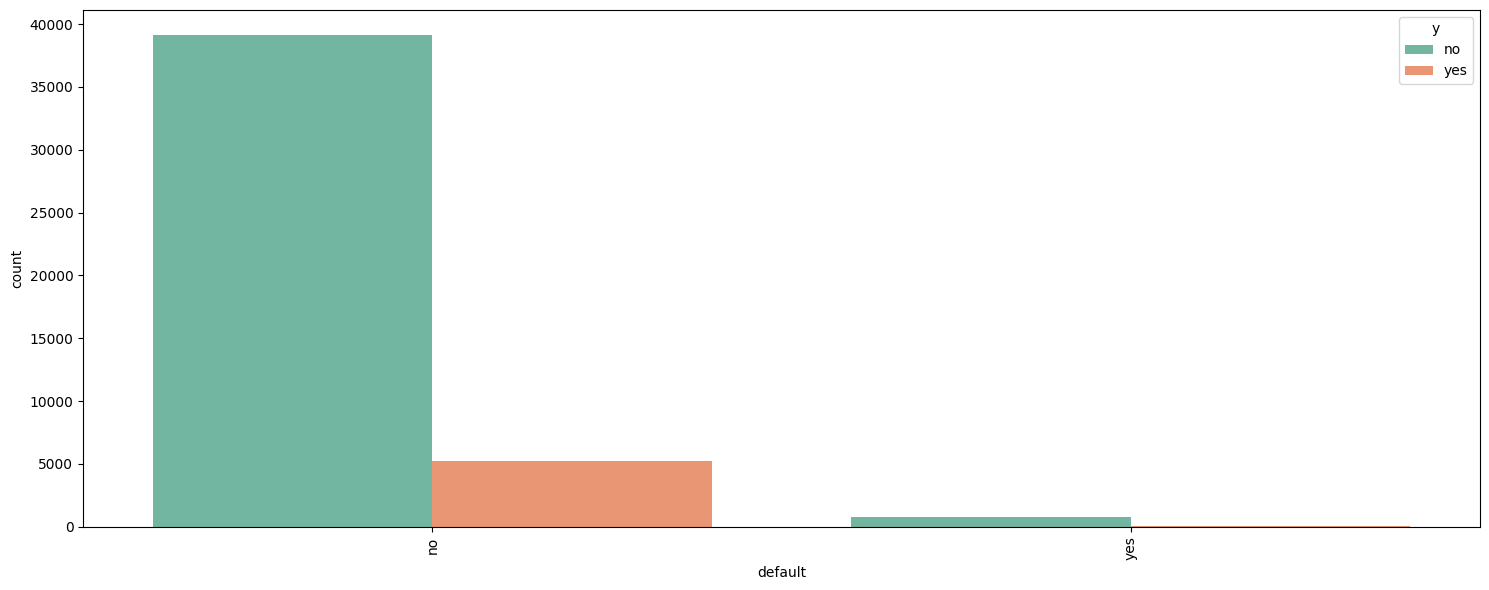

In [14]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="default", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**balance column**

- this column indicates the average yearly balance for each customer.
- according to descriptive statistics of this column printed above, the minimum is -8019, maximum is 102127, mean is almost 1362 and the std is 3044. these statistical parameters show that this column has variety of values and alot of outliers. 
- according to histogram and boxplot below, we can see frequency of the values and find the outliers. 
- the last plot is the histogram of balance column after ignoring the outliers shown in the boxplot. 

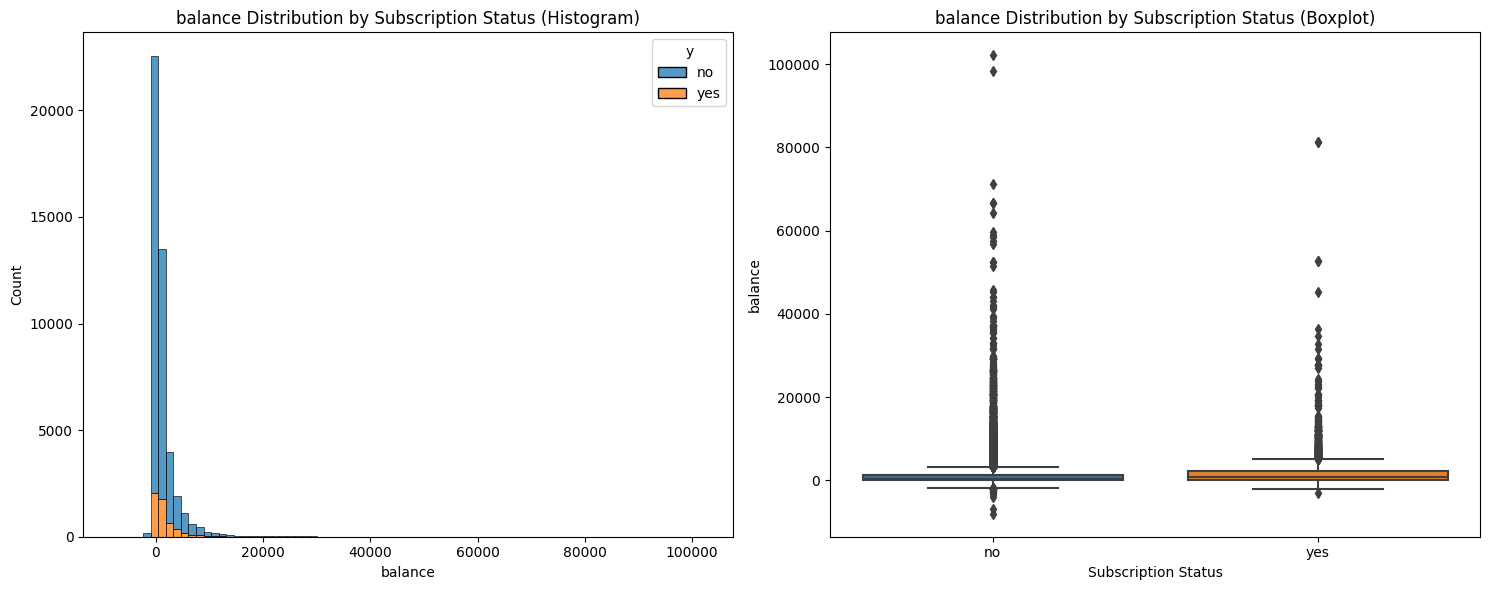

In [15]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='balance', bins=95-18+1, hue='y', multiple='stack')
plt.title('balance Distribution by Subscription Status (Histogram)')
plt.xlabel('balance')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='balance')
plt.title('balance Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('balance')

plt.tight_layout()
plt.show()

In [16]:
# balance_data = df["balance"]

# Q1 = np.percentile(balance_data, 25)
# Q3 = np.percentile(balance_data, 75)

# IQR = Q3 - Q1

# lower_whisker = Q1 - 1.5 * IQR
# upper_whisker = Q3 + 1.5 * IQR

# print("Lower whisker:", lower_whisker)
# print("Upper whisker:", upper_whisker)

In [17]:
# sns.histplot(df["balance"][(df["balance"] >= -1962) & (df["balance"] <= 3462)])
# plt.show()

**housing column**

- this column shows if a customer has a housing loan or not. 
- we can see that the proportion of people having a housing loan is more than others (55.6% vs 44.4%).

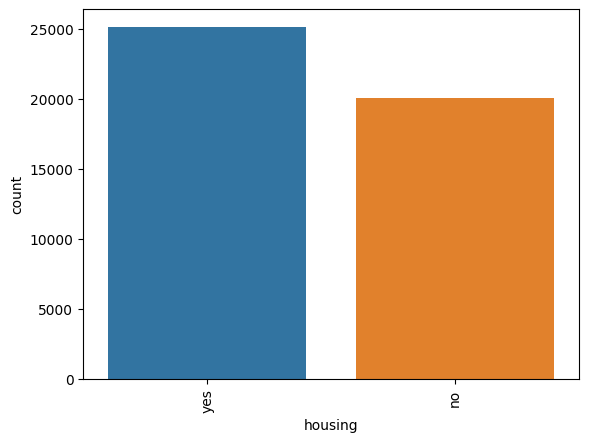

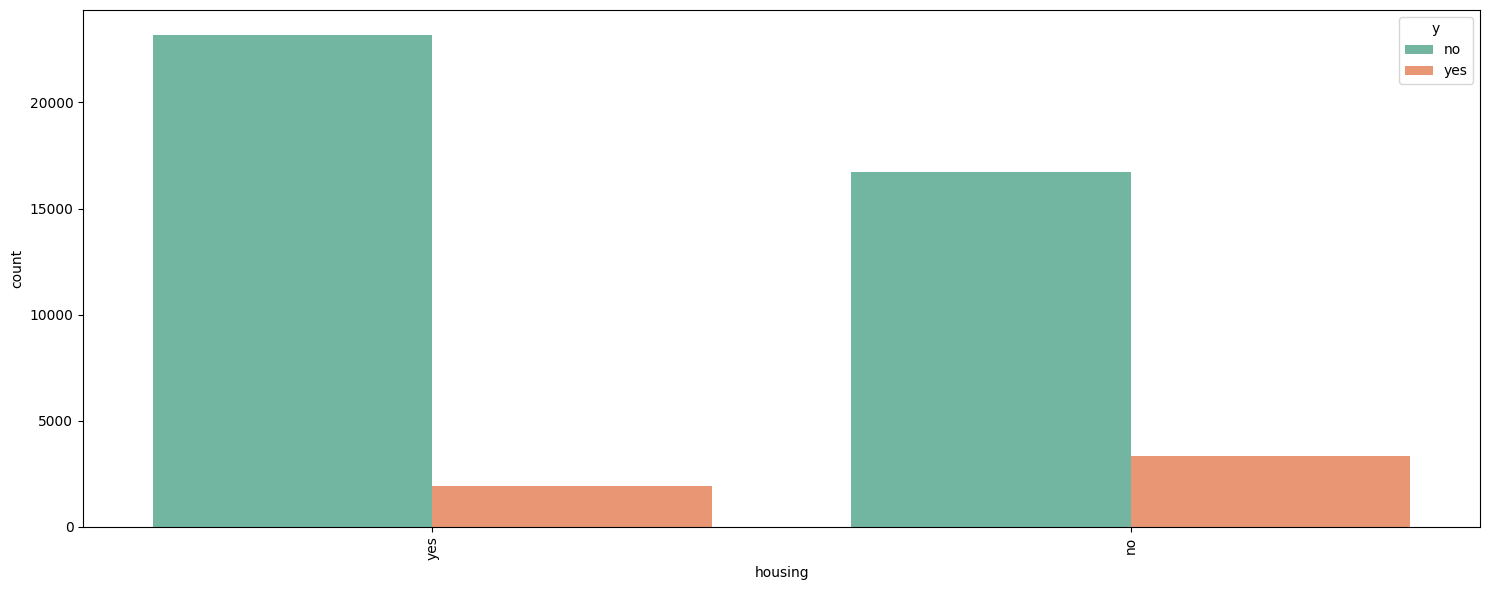

In [18]:
sns.countplot(df , x = "housing")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="housing", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

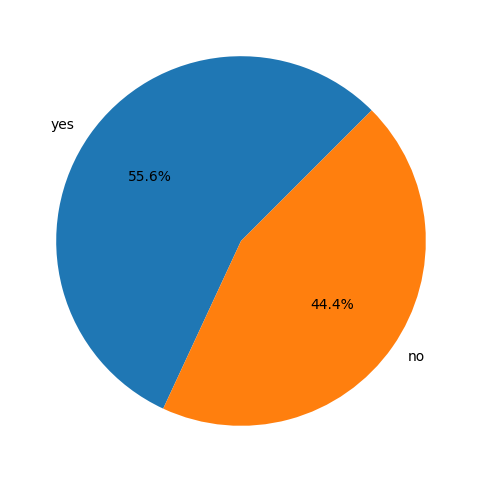

In [19]:
housing_counts = df['housing'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=45)
plt.show()

**loan column**

- this column shows if a customer has a personal loan or not. 
- we can see that the proportion of people not having a housing loan is more than others. (almost 84% vs 16%)

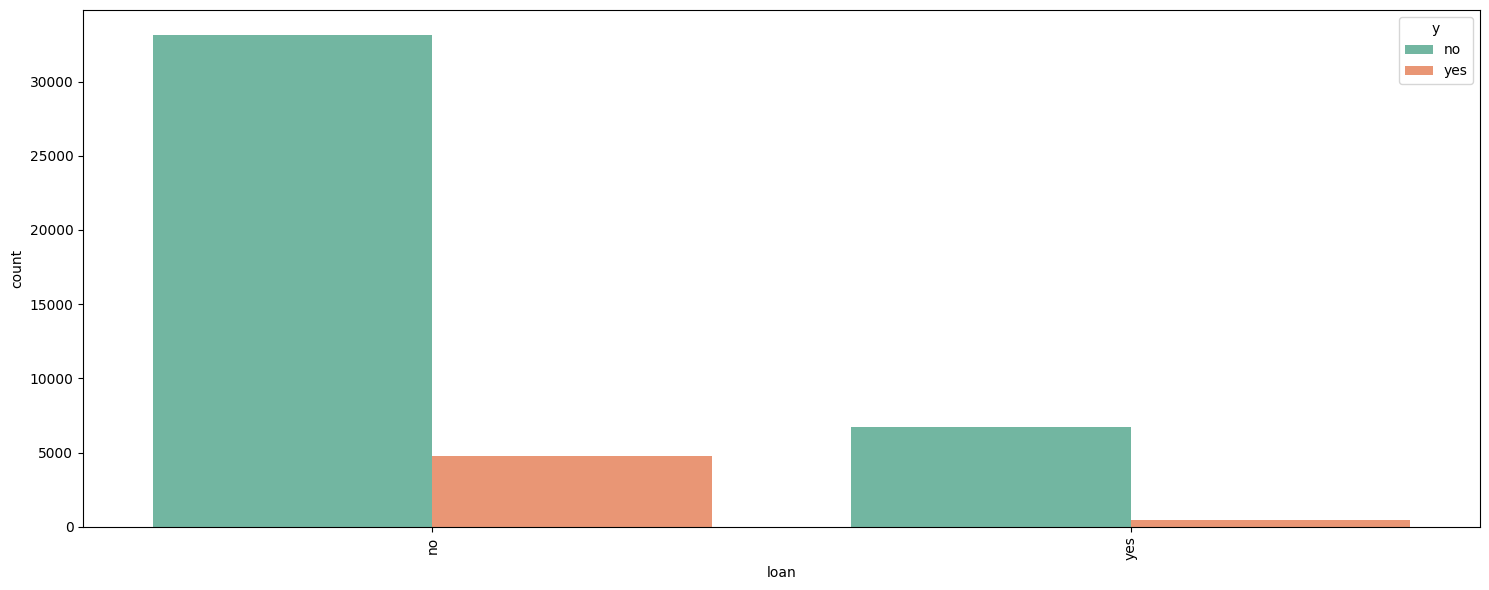

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="loan", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
df['loan'].value_counts(normalize=True) * 100

loan
no     83.977351
yes    16.022649
Name: proportion, dtype: float64

**contact column**

- this column shows contact communication type
- we can see there are some "unknown" values which can be considered as missing values. 
- most of the customers' contact type is cellular.

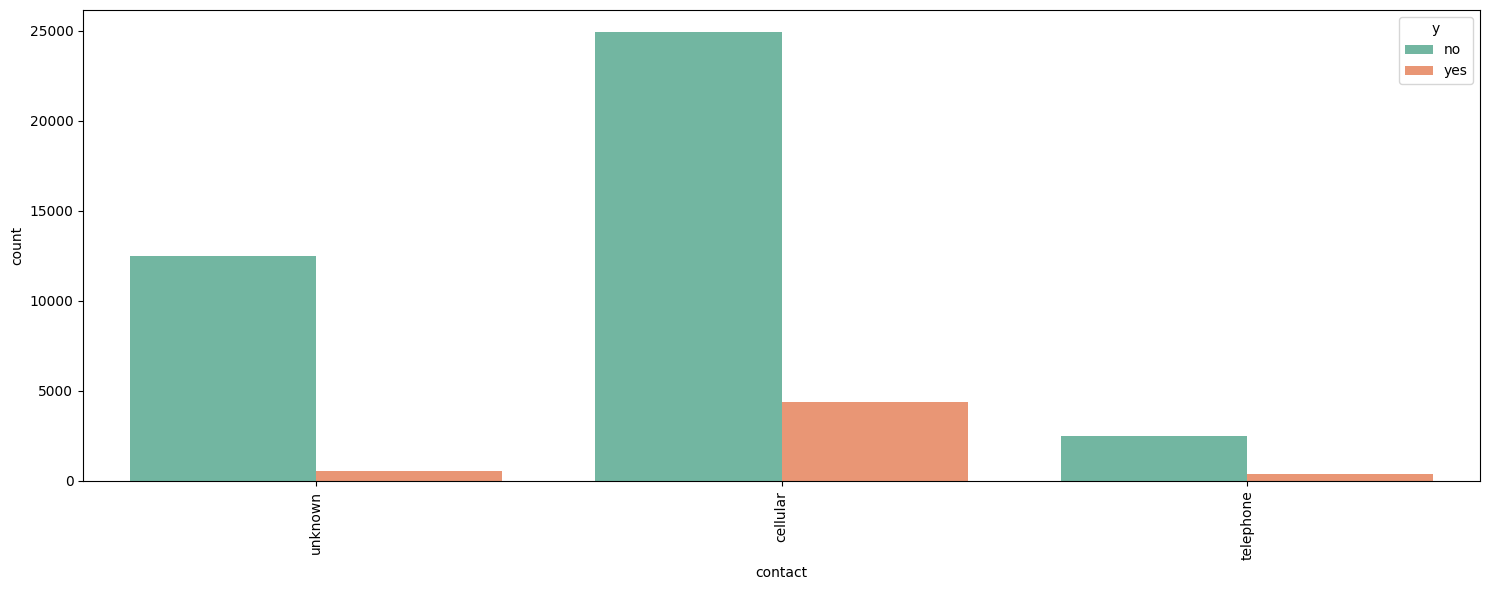

In [22]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="contact", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**day column**

- this column shows last contact day of the month 
- there seems no specific pattern in this column. 

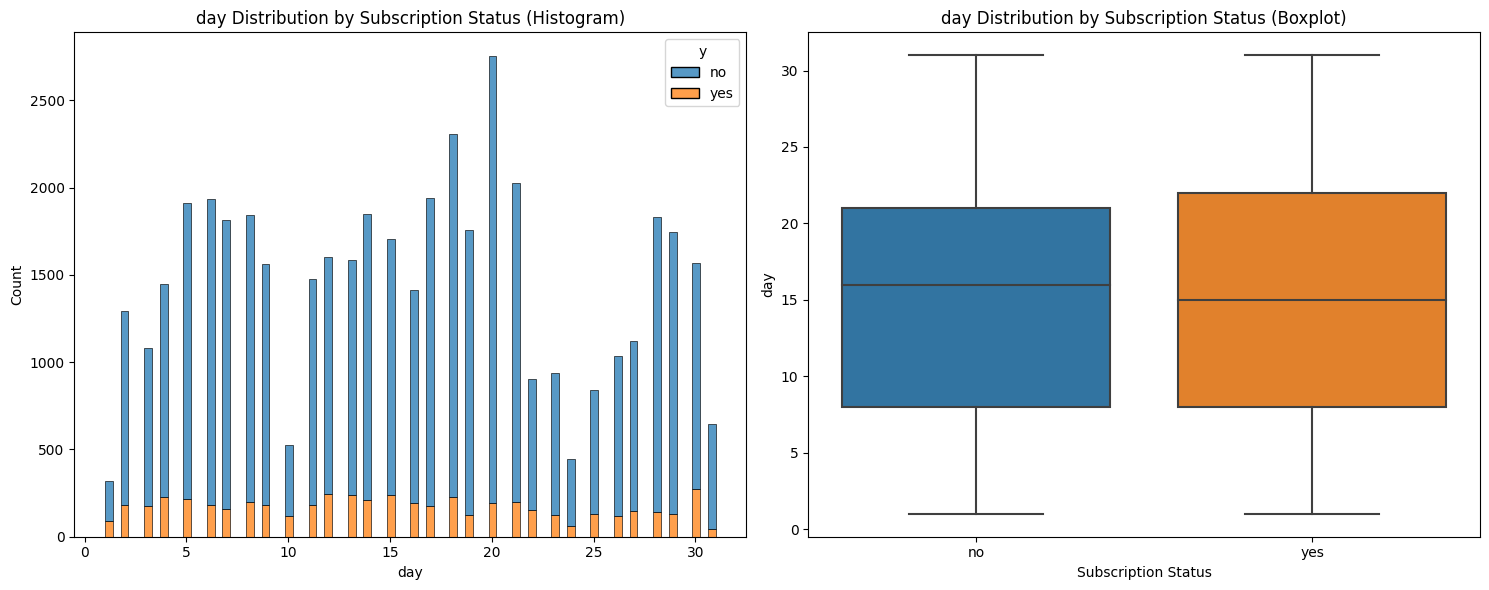

In [23]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='day', bins=95-18+1, hue='y', multiple='stack')
plt.title('day Distribution by Subscription Status (Histogram)')
plt.xlabel('day')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='day')
plt.title('day Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('day')

plt.tight_layout()
plt.show()

**month column**

- this column shows last contact month of year. 
- we can see that May has the most frequency. 
- December has the least frequency. 

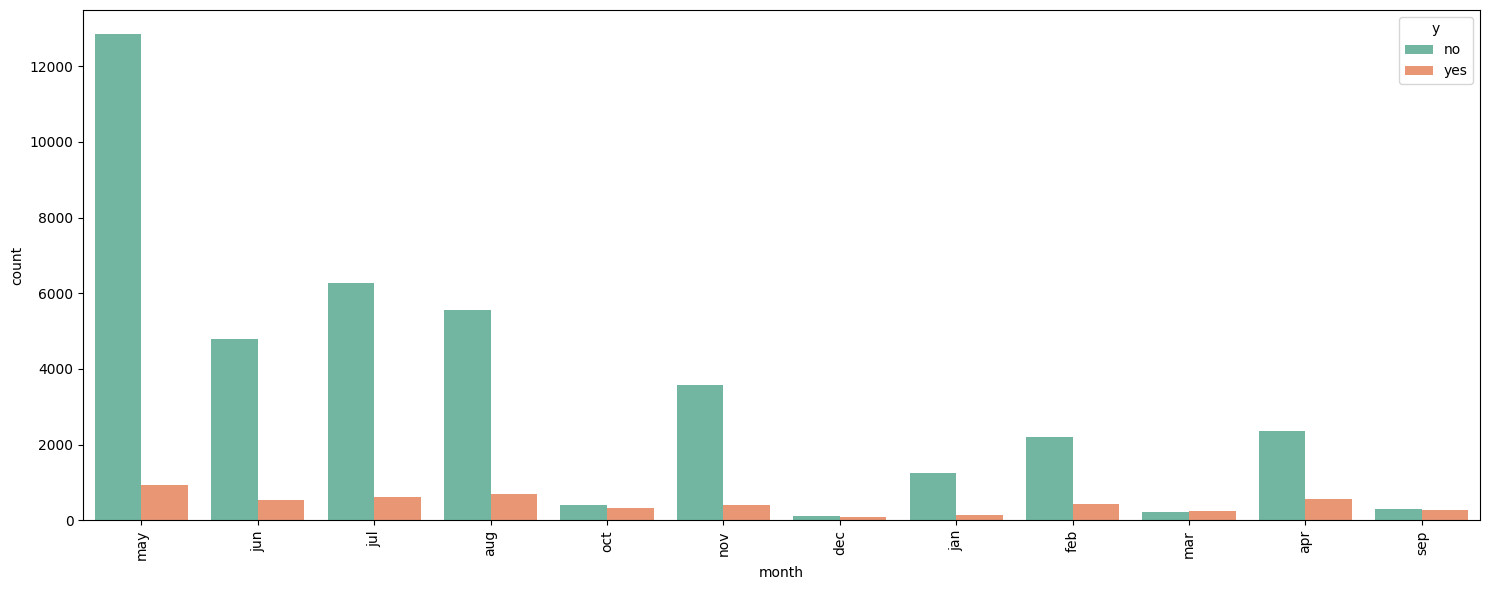

In [24]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="month", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**duration column**

- this column indicates the last contact duration for a customer. 
- according to descriptive statistics of this column printed above, the minimum is 0, maximum is 4918, mean is almost 258 and the std is 257. these statistical parameters show that this column has variety of values and alot of outliers. 
- according to histogram and boxplot below, we can see frequency of the values and find the outliers. 
- the last plot is the histogram of duration column after ignoring the outliers shown in the boxplot. 

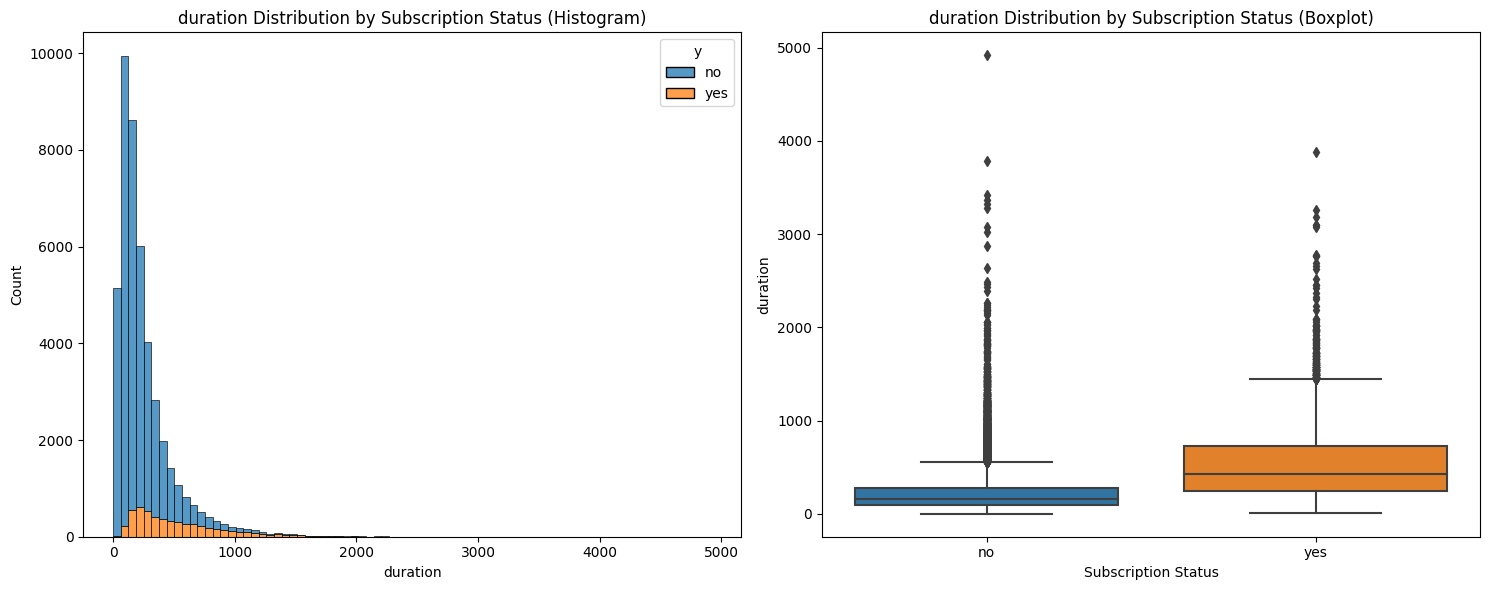

In [25]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='duration', bins=95-18+1, hue='y', multiple='stack')
plt.title('duration Distribution by Subscription Status (Histogram)')
plt.xlabel('duration')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='duration')
plt.title('duration Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('duration')

plt.tight_layout()
plt.show()

In [26]:
# duration_data = df["duration"]

# Q1 = np.percentile(duration_data, 25)
# Q3 = np.percentile(duration_data, 75)

# IQR = Q3 - Q1
# upper_whisker = Q3 + 1.5 * IQR

# print("Upper whisker:", upper_whisker)

In [27]:
# sns.histplot(df["duration"][df["duration"] <= 643])
# plt.show()

**campaign column**

- this column shows number of contacts performed during this campaign and for this customer.
- according to descriptive statistics of this column printed above, the minimum is 1, maximum is 63, mean is almost 2.76 and the std is almost 3.
- according to histogram and boxplot below, we can see frequency of the values and find the outliers. 
- the last plot is the histogram of duration column after ignoring the outliers shown in the boxplot. 

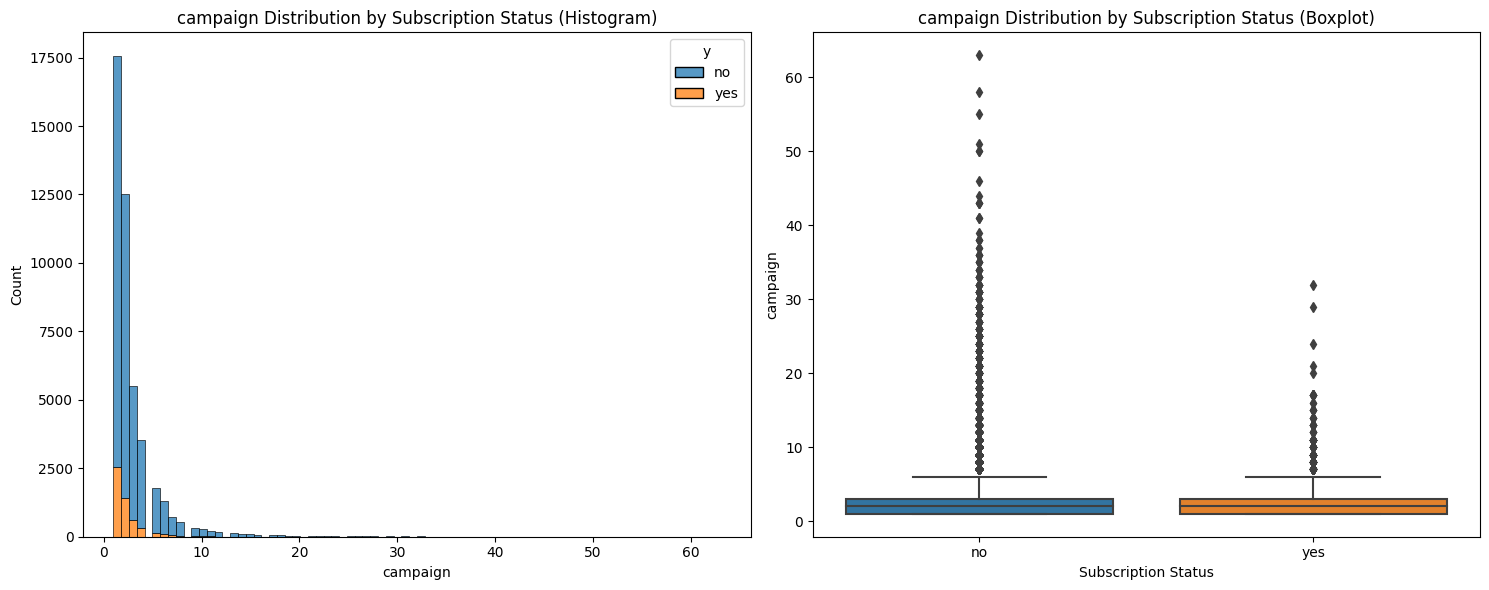

In [28]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='campaign', bins=95-18+1, hue='y', multiple='stack')
plt.title('campaign Distribution by Subscription Status (Histogram)')
plt.xlabel('campaign')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='campaign')
plt.title('campaign Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('campaign')

plt.tight_layout()
plt.show()

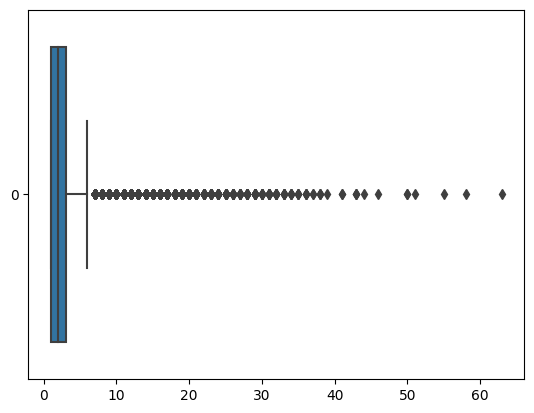

In [29]:
sns.boxplot(df["campaign"] , orient = "h")
plt.show()

In [30]:
# duration_data = df["campaign"]

# Q1 = np.percentile(duration_data, 25)
# Q3 = np.percentile(duration_data, 75)

# IQR = Q3 - Q1
# upper_whisker = Q3 + 1.5 * IQR

# print("Upper whisker:", upper_whisker)

In [31]:
# sns.histplot(df["campaign"][df["campaign"] <= 6] , bins=6)
# plt.show()

**pdays column**

- this column shows the number of days that passed by after the client was last contacted from a previous campaign.
- -1 means client was not previously contacted.

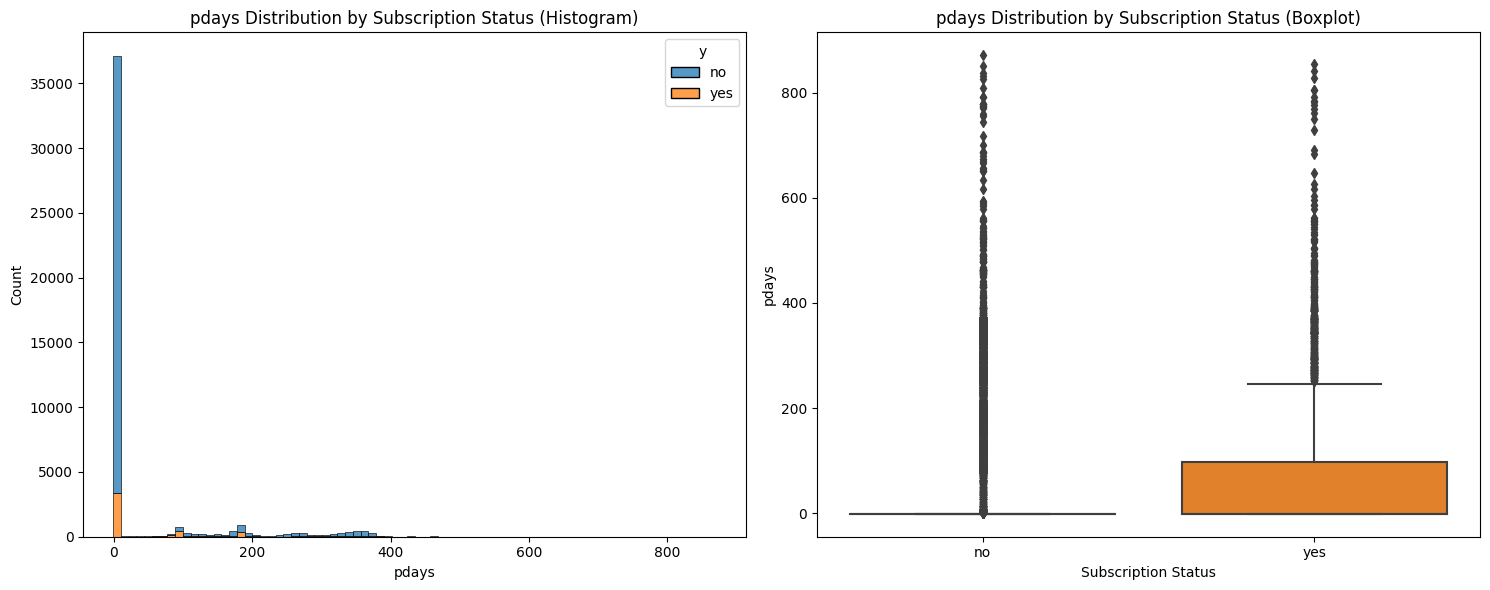

In [32]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='pdays', bins=95-18+1, hue='y', multiple='stack')
plt.title('pdays Distribution by Subscription Status (Histogram)')
plt.xlabel('pdays')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='pdays')
plt.title('pdays Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('pdays')

plt.tight_layout()
plt.show()

In [33]:
# positive_pdays_count = df["pdays"][df["pdays"] > -1].count()
# negative_pdays_count = df["pdays"][df["pdays"] == -1].count()

# labels = ['previously contacted', "not previously contacted"]
# counts = [positive_pdays_count, negative_pdays_count]

# plt.figure(figsize=(8, 6))
# plt.pie(counts, labels=labels, autopct='%1.1f%%')
# plt.show()

In [34]:
# sns.boxplot(df["pdays"] , orient = "h")
# plt.show()

In [35]:
# pdays_data = df["pdays"]

# Q1 = np.percentile(pdays_data, 25)
# Q3 = np.percentile(pdays_data, 75)

# IQR = Q3 - Q1

# lower_whisker = Q1 - 1.5 * IQR
# upper_whisker = Q3 + 1.5 * IQR

# print("Q1:", Q1)
# print("Q3:", Q3)
# print("IQR:", IQR)
# print("Lower whisker:", lower_whisker)
# print("Upper whisker:", upper_whisker)

In [36]:
# sns.boxplot(x = df["pdays"][df["pdays"] > -1] , orient="h")
# plt.show()

In [37]:
# new_pdays_data = df["pdays"][df["pdays"] > -1]

# Q1 = np.percentile(new_pdays_data, 25)
# Q3 = np.percentile(new_pdays_data, 75)

# IQR = Q3 - Q1

# upper_whisker = Q3 + 1.5 * IQR

# print("Upper whisker:", upper_whisker)

In [38]:
# sns.histplot(df["pdays"][(df["pdays"] > -1) &(df["pdays"] <= 618 )] , bins = 619)
# plt.show()

**previous column**

- this column shows the number of contacts performed before this campaign and for this client

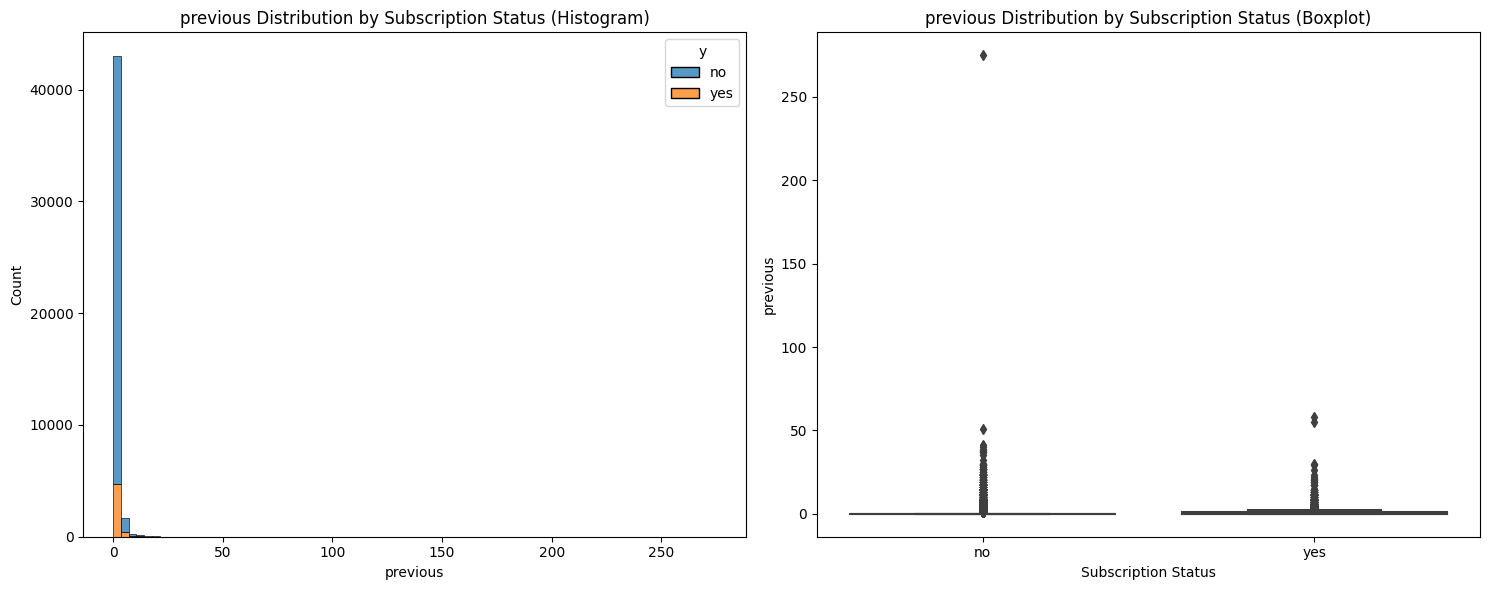

In [39]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='previous', bins=95-18+1, hue='y', multiple='stack')
plt.title('previous Distribution by Subscription Status (Histogram)')
plt.xlabel('previous')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='previous')
plt.title('previous Distribution by Subscription Status (Boxplot)')
plt.xlabel('Subscription Status')
plt.ylabel('previous')

plt.tight_layout()
plt.show()

In [40]:
# positive_previous_count = df["previous"][df["previous"] > 0].count()
# zero_previous_count = df["previous"][df["previous"] == 0].count()

# labels = ['previously contacted', "not previously contacted"]
# counts = [positive_previous_count, zero_previous_count]

# plt.figure(figsize=(8, 6))
# plt.pie(counts, labels=labels, autopct='%1.1f%%')
# plt.show()

In [41]:
# sns.boxplot(x = df["previous"][df["previous"] > 0] , orient="h")
# plt.show()

In [42]:
# new_previous_data = df["previous"][df["previous"] > 0]

# Q1 = np.percentile(new_previous_data, 25)
# Q3 = np.percentile(new_previous_data, 75)

# IQR = Q3 - Q1

# upper_whisker = Q3 + 1.5 * IQR

# print("Upper whisker:", upper_whisker)

In [43]:
# sns.histplot(df["previous"][(df["previous"] > 0) &(df["previous"] <= 8 )] , bins = 8)
# plt.show()

**poutcome column**

- this column shows the outcome of the previous marketing campaign
- "unknown" means that majority (81.74%) of the people did not know about the previous marketing campaign. so this "unknown" cannot be considered as missing value.

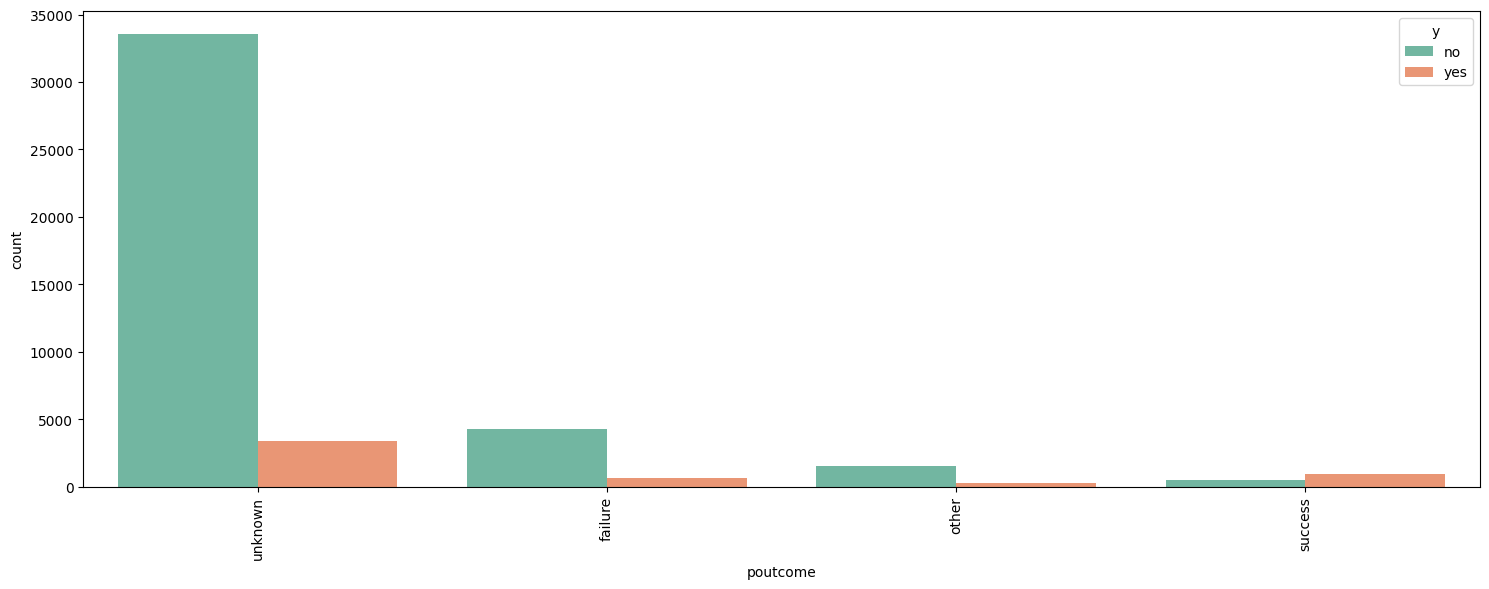

In [44]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="poutcome", hue="y", palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
df["poutcome"].value_counts(normalize = True)*100

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64

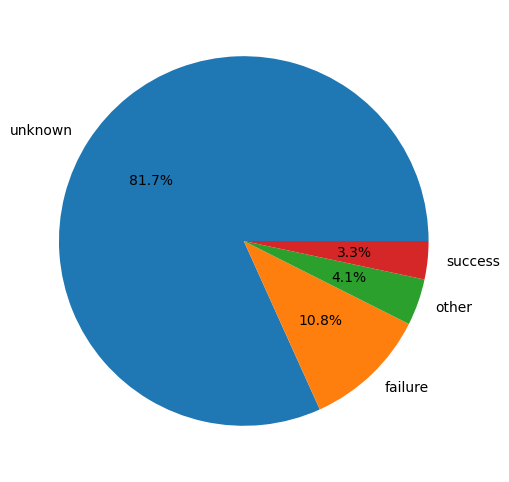

In [46]:
poutcome_counts = df['poutcome'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%')
plt.show()

**y column**

- this column shows whether the client subscribed a term deposit or not.
- The target variable is **highly** imbalanced.

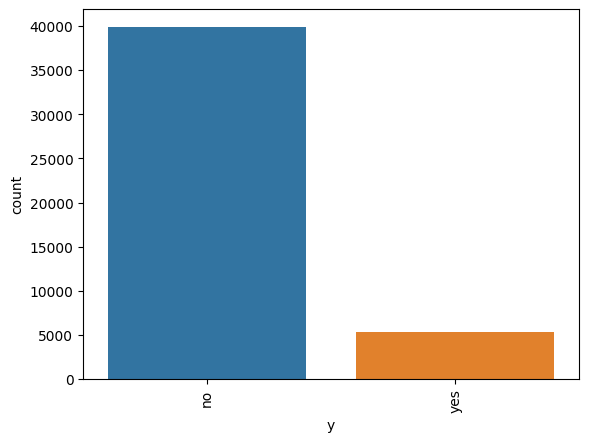

In [47]:
sns.countplot(df , x = "y")
plt.xticks(rotation = 90)
plt.show()

In [48]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

<h2> Preprocessing </h2>

imports

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

<h3> missing value handling </h3>

- handling "unknown" values mentioned before by replacing them with mode of each column.

In [50]:
df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
df["education"].replace(["unknown"],df["education"].mode(),inplace = True)
df["contact"].replace(["unknown"],df["contact"].mode(),inplace = True)

In [51]:
df['y'] = df['y'].replace({"yes": 1 , "no": 0})

In [52]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


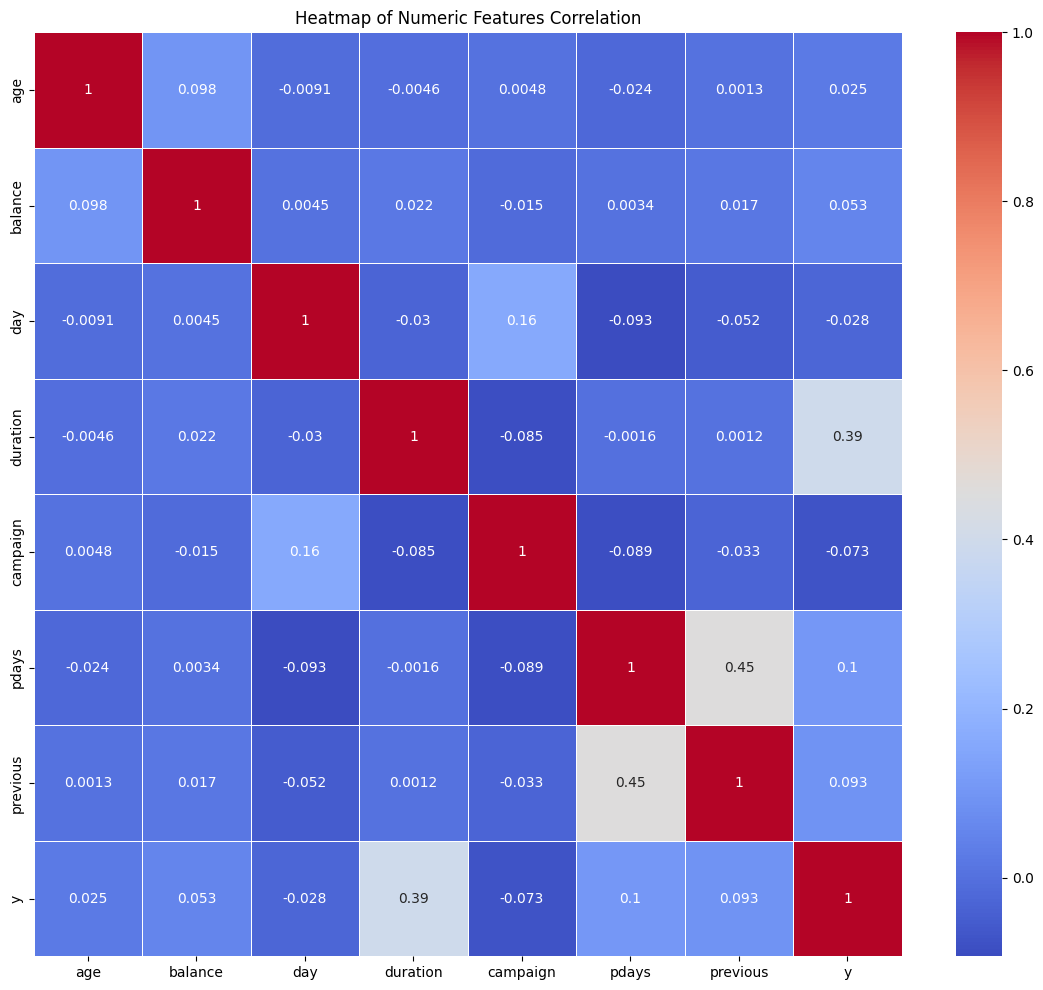

In [53]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

<h3> encoding</h3>

 <h4>convert yes/no to 1/0</h4>

In [54]:
df['default'] = df['default'].replace({"yes": 1 , "no": 0})
df['housing'] = df['housing'].replace({"yes": 1 , "no": 0})
df['loan'] = df['loan'].replace({"yes": 1 , "no": 0})

 <h4>convert previous to 1/0 and dropping pdays</h4>

In [55]:
df['previous'] = df['previous'].apply(lambda x: 0 if x == 0 else 1)
df.drop(columns=['pdays'], inplace=True)

<h4>label encoding of the ordinal categorical features (education and month)</h4>

In [56]:
df['education'] = df['education'].replace({"tertiary": 2 , "secondary": 1 , "primary" :0})

In [57]:
df['month'] = df['month'].replace({"jan": 1, "feb": 2, "mar" :3,
                                   "apr":4 ,"may": 5, "jun":6,
                                   "jul":7 , "aug":8, "sep": 9,
                                   "oct": 10, "nov": 11 , "dec":12})

<h4>one hot encoding of the remaining categorical features</h4>

In [58]:
df = pd.get_dummies(df, columns=["job", "marital", "poutcome" , "contact"]  , drop_first = True , dtype = int )

In [59]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone
0,58,2,0,2143,1,0,5,5,261,1,...,0,0,0,0,1,0,0,0,1,0
1,44,1,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,1,0
2,33,1,0,2,1,1,5,5,76,1,...,0,0,0,0,1,0,0,0,1,0
3,47,1,0,1506,1,0,5,5,92,1,...,0,0,0,0,1,0,0,0,1,0
4,33,1,0,1,0,0,5,5,198,1,...,0,0,0,0,0,1,0,0,1,0


<h4>outlier handling</h4>

- using IQR
- it doesn't improve the model performance

In [60]:
# outlier_columns = ["balance" , "duration" , "campaign"]
# lower_whisker = {"balance":-1962 , "duration": 0 , "campaign":1 }
# upper_whisker = {"balance":3462 , "duration":643 , "campaign":6 }
# for col in outlier_columns:
#     df[col] = np.where(df[col] < lower_whisker[col], lower_whisker[col] , df[col])
#     df[col] = np.where(df[col] > upper_whisker[col] , upper_whisker[col] , df[col])

<h3>Scaling</h3>

- use minmax scaler

In [61]:
# columns = df.columns 
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df , columns=[columns])